In [2]:
import glob
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('styleNB.mplstyle')


In [3]:
batch1 = (5845+1899+6159+7417+2051+6227+6696+2340+6887)
batch2 = (9000+4134+7540+8958+3496+6594+9756+3062+6529)

print(batch1/batch2)

0.7706411146286546


In [17]:
counts = [5845/0.771, 1899/0.771, 6159/0.771, 7417/0.771, 2051/0.771, 6227/0.771, 6696/0.771, 2340/0.771, 6887/0.771,
        9000, 4134, 7540, 8958, 3496, 6594, 9756, 3062, 6529,
        26266, 25079, 23077, 18663, 22913, 22567]
vol = [1.37, 1.39, 1.33, 1.3, 1.29, 1.36, 1.35, 1.3, 1.3, 
       1.19, 1.28, 1.25, 1.35, 1.27, 1.27, 1.33, 1.25, 1.30,
      1.27, 1.21, 1.27, 1.72, 1.12, 1.24]
labels = ['sgControl1', 'sgITGB2', 'sgFLCN',
         'sgControl1', 'sgITGB2', 'sgFLCN',
         'sgControl1', 'sgITGB2', 'sgFLCN',
         'sgControl1', 'sgITGB2', 'sgFLCN',
         'sgControl1', 'sgITGB2', 'sgFLCN',
         'sgControl1', 'sgITGB2', 'sgFLCN',
         'sgControl1_all', 'sgITGB2_all', 'sgFLCN_all',
         'sgControl1_all', 'sgITGB2_all', 'sgFLCN_all']

In [29]:
df = pd.DataFrame(counts, columns = ['counts'])

In [30]:
df['volume_ml'] = vol
df['label'] = labels
df['index'] = df.index

In [31]:
df['counts_total'] = df['counts']*10*df['volume_ml']
df

,counts,volume_ml,label,index,counts_total
0,7581.063554,1.37,sgControl1,0,103860.570687
1,2463.035019,1.39,sgITGB2,1,34236.186770
2,7988.326848,1.33,sgFLCN,2,106244.747082
3,9619.974060,1.30,sgControl1,3,125059.662776
4,2660.181582,1.29,sgITGB2,4,34316.342412
5,8076.523995,1.36,sgFLCN,5,109840.726329
6,8684.824903,1.35,sgControl1,6,117245.136187
7,3035.019455,1.30,sgITGB2,7,39455.252918
8,8932.555123,1.30,sgFLCN,8,116123.216602
9,9000.000000,1.19,sgControl1,9,107100.000000


In [35]:
for line in ['sgControl1', 'sgITGB2', 'sgFLCN']:
    df_ = df[df.label == line]
    all_mean = df[df.label == line+'_all'].counts_total.mean()
    for g,d_ in df_.groupby('index'):
        
        print(line, d_.counts_total.values/all_mean)

sgControl1 [0.31733412]
sgControl1 [0.38210553]
sgControl1 [0.35822914]
sgControl1 [0.32723183]
sgControl1 [0.36949698]
sgControl1 [0.39645099]
sgITGB2 [0.1222543]
sgITGB2 [0.12254053]
sgITGB2 [0.14089111]
sgITGB2 [0.18895536]
sgITGB2 [0.1585455]
sgITGB2 [0.13667654]
sgFLCN [0.37089591]
sgFLCN [0.38344932]
sgFLCN [0.40538123]
sgFLCN [0.32902276]
sgFLCN [0.29234606]
sgFLCN [0.29630201]


sgControl1 0.3584747644220098
sgITGB2 0.14497722331551588
sgFLCN 0.34623288144223224


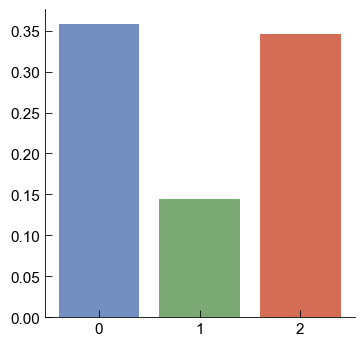

In [36]:
count = 0
for line in ['sgControl1', 'sgITGB2', 'sgFLCN']:
    recov_mean = df[df.label == line].counts_total.mean()
    all_mean = df[df.label == line+'_all'].counts_total.mean()
    print(line, recov_mean/all_mean)
    plt.bar(count, recov_mean/all_mean)
    count+=1

([<matplotlib.axis.XTick at 0x7fc39868c490>,
 [Text(0, 0, 'sgControl'), Text(1, 0, 'sgITGB2'), Text(2, 0, 'sgFLCN')])

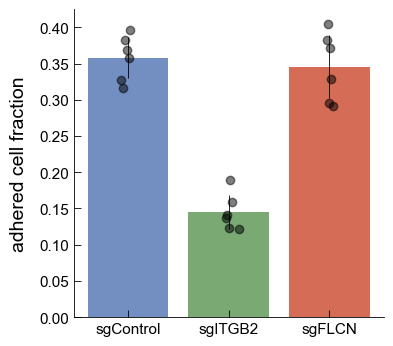

In [83]:
sgControl1 = [0.317, 0.382, 0.358, 0.327, 0.369, 0.396]
sgITGB2 = [0.122, 0.123, 0.141, 0.189, 0.159, 0.137]
sgFLCN = [0.371, 0.383, 0.405, 0.329, 0.292, 0.296]

plt.bar(0, np.mean(sgControl1), yerr=np.std(sgControl1))
for i in np.arange(6):
    plt.scatter(0.05*np.random.randn(1), sgControl1[i], color = 'k', alpha = 0.5)

plt.bar(1, np.mean(sgITGB2), yerr=np.std(sgITGB2))
for i in np.arange(6):
    plt.scatter(1+0.05*np.random.randn(1), sgITGB2[i], color = 'k', alpha = 0.5)

plt.bar(2, np.mean(sgFLCN), yerr=np.std(sgFLCN))
for i in np.arange(6):
    plt.scatter(2+0.05*np.random.randn(1), sgFLCN[i], color = 'k', alpha = 0.5)
    
plt.ylabel('adhered cell fraction', fontsize = 14)
plt.xticks([0,1,2], ['sgControl', 'sgITGB2', 'sgFLCN'])

array([1.28093399])

In [55]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 

In [68]:
0.02*np.random.randn(10)

array([ 0.01145367, -0.00358753, -0.01940642, -0.00086474,  0.00059702,
       -0.00356119, -0.00259751, -0.02647957, -0.01366904, -0.00650013])